# Workshop 1: Mobile Price Range Classification

In this workshop we will learn how to train a neural network with numeric data as input to predict the price range of mobile phones ([info of the data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#)). The main blocks of the workshop are:

1. Get the data from Google Drive.
2. Load and Pre-process the data.
3. Define a Fully Connected Neural Network.
4. Choose loss function and optimizer.
5. Train the network.

The main libraries thar will be used in the workshop are:

- Tensorflow
- Keras
- Sci-kit Learn
- Matplotlib
- Numpy
- Pandas

[Reference](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)

## 1. Get the data from Google Drive

In [ ]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download data
download = drive.CreateFile({'id': '1igTyUp-YTHG0ig9VeNu83R8jBWn5Djji'})
download.GetContentFile('mobile_price.zip')

In [1]:
# Extract data from zip file
import zipfile
from pathlib import Path
data_path = Path("./mobile_price.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [3]:
# List files of ./data directory
!ls ./data

El formato del par metro no es correcto: "data".


## 2. Load and Pre-process the data



In [4]:
# Load dependencies for loading data
import numpy as np
import pandas as pd

In [5]:
# Load training dataset and check variables
dataset = pd.read_csv('./data/train.csv')

In [6]:
# Show variables
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Show first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
# Convert pandas Dataframe to Numpy Array
dataset_numpy = dataset.values

In [10]:
# Show data type before and after conversion
print(type(dataset))
print(type(dataset_numpy.dtype))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtype'>


In [11]:
# Separate input variables from output label
X = dataset_numpy[:, :20]
y = dataset_numpy[:, 20:21]

In [12]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (2000, 20)
Shape of training labels:  (2000, 1)


In [13]:
# Show different classes to predict
np.unique(y)

array([0., 1., 2., 3.])

In [14]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [15]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]
Standard Deviation per variable: 
 [4.39308338e+02 4.99974999e-01 8.15800182e-01 4.99909742e-01
 4.34035825e+00 4.99537536e-01 1.81411780e+01 2.88343437e-01
 3.53908039e+01 2.28726469e+00 6.06279867e+00 4.43669852e+02
 4.32091384e+02 1.08446083e+03 4.21219156e+00 4.35530837e+00
 5.46258904e+00 4.26166341e-01 4.99991000e-01 4.99950998e-01]


In [16]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [1.021e+03 1.000e+00 5.000e-01 1.000e+00 0.000e+00 1.000e+00 5.300e+01
 7.000e-01 1.360e+02 3.000e+00 6.000e+00 9.050e+02 1.988e+03 2.631e+03
 1.700e+01 3.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00]
After normalization: 
 [-0.49513857  1.0100505  -1.2530642   0.98117712 -0.99289039  0.95788598
  1.15502422  0.68754816 -0.12005944 -0.66476784 -0.64598879  0.58577791
  1.70446468  0.46731702  1.11426556 -0.63531667 -0.73426721  0.55964063
  0.99401789 -1.01409939]


In [17]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [18]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 [1.]
After onet-hot encodeing: 
 [0. 1. 0. 0.]


In [19]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)

In [20]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


## 3. Define a Fully Connected Neural Network

In [21]:
# Import dependencies for designing Keras model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))#Softmax: entre 0 y 1 y la suma de todas es 1 por eso se usa para clasificacion multiclase

In [23]:
# Show model information
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


The number of parameters of each layer is obtained as follows:


*   params_dense_1 = (input_var_num + 1) * dense_1_neurons = (20 + 1) * 16 = 336
*   params_dense_2 = (dense_1_neurons + 1) * dense_2_neurons = (16 + 1) * 12 =      204
*   params_dense_3 = (dense_2_neurons + 1) * dense_3_neurons = (12 + 1) * 4 =      52

Where +1 comes from the bias term added in each layer.




## 4. Choose loss function and optimizer


In [24]:
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

## 5. Train the network



In [25]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 3s 51ms/step - loss: 1.5251 - accuracy: 0.2651 - val_loss: 1.2745 - val_accuracy: 0.3800
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3492 - accuracy: 0.3423 - val_loss: 1.2127 - val_accuracy: 0.4500
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2585 - accuracy: 0.4410 - val_loss: 1.1605 - val_accuracy: 0.4800
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2020 - accuracy: 0.4712 - val_loss: 1.0978 - val_accuracy: 0.5200
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 1.1158 - accuracy: 0.5131 - val_loss: 1.0306 - val_accuracy: 0.5550
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 1.0322 - accuracy: 0.5621 - val_loss: 0.9636 - val_accuracy: 0.6100
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.9531 - accuracy: 0.6177 - val_loss: 0.8975 - val_accuracy: 0.6600
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9709 - val_loss: 0.1976 - val_accuracy: 0.9200
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9730 - val_loss: 0.1951 - val_accuracy: 0.9250
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9731 - val_loss: 0.1999 - val_accuracy: 0.9100
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9755 - val_loss: 0.1981 - val_accuracy: 0.9100
Epoch 63/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0930 - accuracy: 0.9711 - val_loss: 0.1990 - val_accuracy: 0.9200
Epoch 64/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0951 - accuracy: 0.9705 - val_loss: 0.1956 - val_accuracy: 0.9250
Epoch 65/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9776 - val_loss: 0.1989 - val_accuracy: 0.9150
Epoch 

In [26]:
# Import dependence for plotting training process 
import matplotlib.pyplot as plt

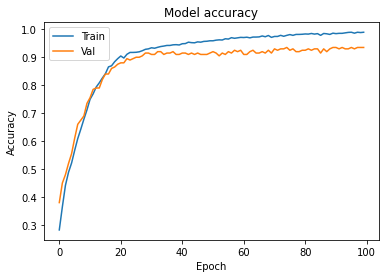

In [27]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

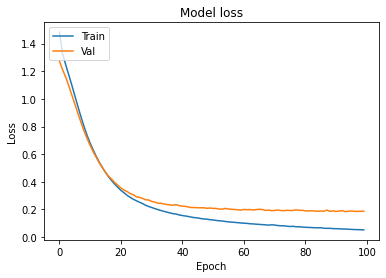

In [28]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [29]:
# Save the model
from pathlib import Path
path = Path('./models')
if not path.exists():
  path.mkdir()
model.save('./models/model_1.h5')

In [30]:
# List files of ./models directory
!ls ./models

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# Exercise 1: Train the model without normalization

In [31]:
# Split data without normalization in training and validation partitions
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, 
                                                  test_size=0.1)

In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 13122.5811 - accuracy: 0.2494 - val_loss: 6509.1758 - val_accuracy: 0.2300
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 3977.8352 - accuracy: 0.2344 - val_loss: 2264.9834 - val_accuracy: 0.2600
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 1201.2997 - accuracy: 0.3956 - val_loss: 638.0198 - val_accuracy: 0.5100
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 527.5718 - accuracy: 0.4917 - val_loss: 459.0396 - val_accuracy: 0.5100
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 380.6604 - accuracy: 0.5122 - val_loss: 339.5815 - val_accuracy: 0.5250
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 286.3878 - accuracy: 0.5233 - val_loss: 269.0822 - val_accuracy: 0.4900
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 215.1991 - accuracy: 0.5183 - val_loss: 212.7152 - 

Epoch 58/100
29/29 [==============================] - 0s 4ms/step - loss: 15.7938 - accuracy: 0.6067 - val_loss: 19.1152 - val_accuracy: 0.5350
Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 15.6625 - accuracy: 0.5800 - val_loss: 17.5898 - val_accuracy: 0.5750
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 15.3865 - accuracy: 0.6078 - val_loss: 19.1773 - val_accuracy: 0.5500
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 14.6318 - accuracy: 0.6128 - val_loss: 17.2202 - val_accuracy: 0.5400
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 14.1294 - accuracy: 0.6050 - val_loss: 17.3481 - val_accuracy: 0.5550
Epoch 63/100
29/29 [==============================] - 0s 4ms/step - loss: 13.8384 - accuracy: 0.6300 - val_loss: 17.0012 - val_accuracy: 0.5750
Epoch 64/100
29/29 [==============================] - 0s 4ms/step - loss: 13.4546 - accuracy: 0.6178 - val_loss: 16.5212 - val_accuracy:

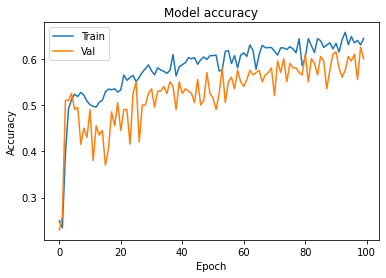

In [33]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

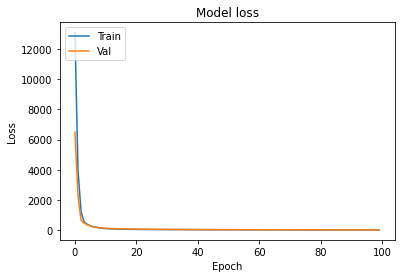

In [34]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 2: Train a simpler model and evaluate the results

In [35]:
# Split data with normalization in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)

In [36]:
# Design a model like the previous but without the second Dense layer
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 1.6667 - accuracy: 0.2389 - val_loss: 1.5926 - val_accuracy: 0.2200
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.5497 - accuracy: 0.2501 - val_loss: 1.5076 - val_accuracy: 0.2400
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 1.4749 - accuracy: 0.2534 - val_loss: 1.4457 - val_accuracy: 0.2650
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3950 - accuracy: 0.2946 - val_loss: 1.3943 - val_accuracy: 0.3050
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 1.3430 - accuracy: 0.3372 - val_loss: 1.3475 - val_accuracy: 0.3750
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2847 - accuracy: 0.3726 - val_loss: 1.3057 - val_accuracy: 0.4000
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2352 - accuracy: 0.4253 - val_loss: 1.2625 - val_accuracy: 0.4450
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9642 - val_loss: 0.2893 - val_accuracy: 0.8850
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9532 - val_loss: 0.2868 - val_accuracy: 0.8750
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9598 - val_loss: 0.2822 - val_accuracy: 0.8950
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.9571 - val_loss: 0.2774 - val_accuracy: 0.8900
Epoch 63/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9546 - val_loss: 0.2736 - val_accuracy: 0.8900
Epoch 64/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.9576 - val_loss: 0.2692 - val_accuracy: 0.9050
Epoch 65/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2189 - accuracy: 0.9565 - val_loss: 0.2640 - val_accuracy: 0.9000
Epoch 

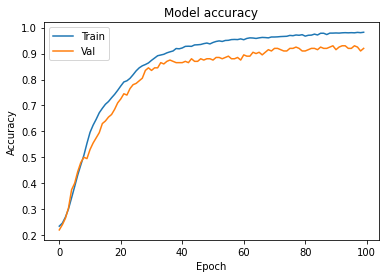

In [40]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

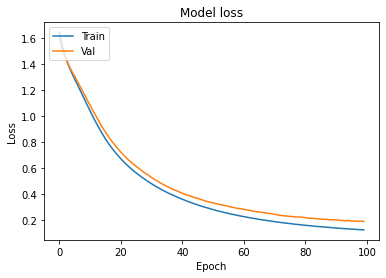

In [41]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 3: Train a more complex model and evaluate the results

In [42]:
# Split data with normalization in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)

In [43]:
# Design a model like the previous but with 128 neurons in the first Dense layer
# and 256 in the second
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [44]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [45]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 1s 14ms/step - loss: 1.2446 - accuracy: 0.4396 - val_loss: 0.8893 - val_accuracy: 0.6950
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.7561 - accuracy: 0.7451 - val_loss: 0.5789 - val_accuracy: 0.8150
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.4758 - accuracy: 0.8557 - val_loss: 0.4065 - val_accuracy: 0.8800
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 0.3271 - accuracy: 0.9205 - val_loss: 0.3140 - val_accuracy: 0.9300
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.2399 - accuracy: 0.9549 - val_loss: 0.2643 - val_accuracy: 0.9350
Epoch 6/100
29/29 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.95 - 0s 7ms/step - loss: 0.1858 - accuracy: 0.9524 - val_loss: 0.2328 - val_accuracy: 0.9300
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1566 - accuracy: 0.9659 - val_loss: 

29/29 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2174 - val_accuracy: 0.9250
Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2197 - val_accuracy: 0.9250
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2282 - val_accuracy: 0.9250
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2195 - val_accuracy: 0.9250
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2248 - val_accuracy: 0.9250
Epoch 63/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2242 - val_accuracy: 0.9200
Epoch 64/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 0.9150
Epoch 65/100
29/29 

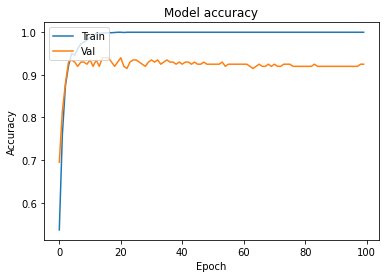

In [46]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

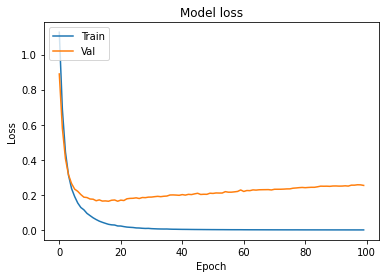

In [47]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 4: Predict the price range of the phones of the test.csv file

In [48]:
# Read it test data from csv
test = pd.read_csv('data/test.csv')

In [51]:
# Show column names (pay attention, maybe there is something different)
print('Train', dataset.columns)
print('Test', test.columns)

Train Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Test Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [52]:
# Convert the data to numpy array
test.drop('id', axis=1, inplace=True)
test_numpy = test.values

In [53]:
# Show shape of the data
test_numpy

array([[1.043e+03, 1.000e+00, 1.800e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.410e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.807e+03, 1.000e+00, 2.800e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.185e+03, 0.000e+00, 1.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.533e+03, 1.000e+00, 5.000e-01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.270e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [ ]:
# Get rid of a column if needed
#Eliminada arriba

In [54]:
# Normalize data. Important!! Always normalize test data with the mean and
# standard deviation learnt from the training data.
test_norm = sc.transform(test_numpy)

In [56]:
# Show data before and after normalization
print("Before normalization: \n", test_numpy[1, :])
print("After normalization: \n", test_norm[1, :])

Before normalization: 
 [8.410e+02 1.000e+00 5.000e-01 1.000e+00 4.000e+00 1.000e+00 6.100e+01
 8.000e-01 1.910e+02 5.000e+00 1.200e+01 7.460e+02 8.570e+02 3.895e+03
 6.000e+00 0.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00]
After normalization: 
 [-0.90487356  1.0100505  -1.2530642   0.98117712 -0.07130748  0.95788598
  1.59600992  1.03435682  1.43401659  0.20963905  0.34365317  0.22740333
 -0.91303718  1.63287318 -1.49720161 -1.32413127 -0.73426721  0.55964063
 -1.00601811 -1.01409939]


In [57]:
# Load model saved during the example
from keras.models import load_model
model = load_model('./models/model_1.h5')

In [58]:
# Predict price range
predictions = model.predict(test_norm)

In [59]:
# Show predictions
predictions

array([[5.6189414e-25, 2.2538183e-11, 1.2800935e-01, 8.7199068e-01],
       [2.5170855e-23, 1.8265296e-11, 1.6169364e-02, 9.8383057e-01],
       [1.0649113e-17, 5.2149563e-08, 5.5796760e-01, 4.4203234e-01],
       ...,
       [9.8669875e-01, 1.3301284e-02, 9.7880988e-11, 3.8232134e-28],
       [5.1593123e-08, 5.0486825e-02, 9.4951272e-01, 3.3713309e-07],
       [2.0800655e-12, 7.0522605e-05, 9.8875952e-01, 1.1169963e-02]],
      dtype=float32)

In [61]:
# Convert predictions to scalars from one-hot encoding
preds = onehot_enc.inverse_transform(predictions)

In [62]:
# Show all scalar predictions
preds

array([[3.],
       [3.],
       [2.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [3.],
       [1.],
       [1.],
       [3.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [3.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [3.],
       [1.],
       [2.],
       [1.],
       [0.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [1.],
       [1.],
       [3.],
       [3.],
       [3.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [3.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [3.],
       [0.],
       [2.],

In [63]:
# Show the first test sample in Dataframe format
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [64]:
# Show prediction for that sample
preds_df = pd.DataFrame({'price_range': preds.flatten()})
res = pd.concat([test, preds_df], axis=1)
res.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3.0
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3.0
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1.0
